<a href="https://colab.research.google.com/github/dduniverse/ML-study/blob/main/13_%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA
PCA는 Principal Component Anaylsis의 약자로, 주성분 분석이라고도 부름
- 비지도 학습에 속하기 때문에 당연히 종속변수는 존재하지 않고, 어떤 것을 예측하지도 분류하지도 않음
- 데이터의 차원을 축소하는데 목적을 둠
- 기존의 변수 중 일부를 그대로 선택하는 방식이 아니라, 기존 변수들의 정보를 모두 반영하는 새로운 변수들을 만드는 방식으로 차원 축소를 함


**차원 축소**
- 변수의 개수를 줄여 데이터의 차원을 축소하는 것
-  가능한 변수의 특성을 보존해내는 기법

|장점|단점|
|---|---|
|다차원을 2차원에 적합하도록 차원 축소하여 시각화에 유용|기존 변수가 아닌 새로운 변수를 사용하여 해석하는데 어려움이 있음|
|변수 간의 높은 상관관계 문제를 해결해줌|차원이 축소됨에 따라 정보 손실이 불가피함|


- 다차원 변수들을 2차원 그래프로 표현하는데 사용할 수 있음
- 변수가 너무 많아 모델 학습에 시간이 너무 오래 걸릴 때 차원 축소를 진행하면 학습에 드는 시간을 줄일 수 있어 유용함
- 오버피팅을 방지하는 용도로 사용할 수도 있음

## 차원을 축소해서 그래프 그리기: 고객 데이터셋

### 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer_pca.csv'
customer = pd.read_csv(file_url)
customer.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


고객별 총 지출금액 및 범주별 지출금액이 스케일링 된 상태로 정리되어 있고, 마지막 컬럼에는 각 고객이 속한 클러스터 라벨(label)이 들어있음
- 변수가 너무 많아 2차원의 그림으로 표현하기 어려움
- PCA를 사용하여 이 변수들을 변수 2개로 축소한 뒤 산점도 그래프로 출력해 클러스터가 어떻게 나뉘었는지 확인

In [3]:
customer_X = customer.drop('label', axis=1)  # 독립변수
customer_y = customer['label']  # 종속변수

### 그래프 표현을 위한 차원 축소

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 주성분 개수 지정
pca.fit(customer_X)  # 학습
customer_pca = pca.transform(customer_X)  # 변환
customer_pca

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [5]:
# 데이터프레임으로 변환
customer_pca = pd.DataFrame(customer_pca, columns = ['PC1', 'PC2'])

In [6]:
customer_pca = customer_pca.join(customer_y)  # 데이터 합치기
customer_pca.head()

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


<Axes: xlabel='PC1', ylabel='PC2'>

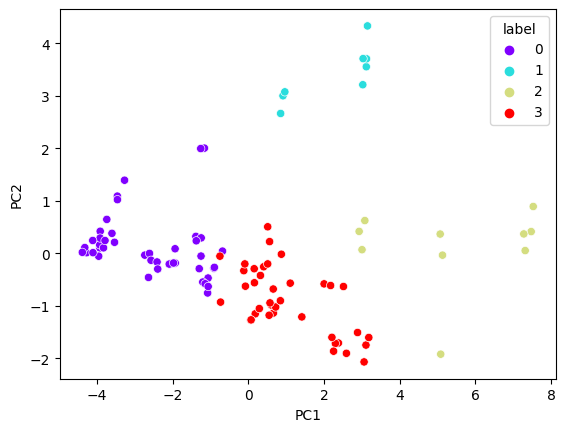

In [7]:
sns.scatterplot(x='PC1', y='PC2', data=customer_pca, hue='label', palette='rainbow')

보라색과 빨간색 클러스터는 가깝게 붙어 있어서 경계가 모호하기는 하지만 언뜻 보기에 그럴싸하게 잘 나뉨
- PCA를 통해 얻어낸 변수 PC1과 PC2는 기존의 모든 변수를 복합적으로 반영하여 만들어졌기 때문에명료하게 이 새로운 변수들을 해석하기 쉽지 않음
- `pca.components_`를 사용하면 각 주성분과 기존 변수와의 상관관계를 알 수 있음

In [8]:
pca.components_  # 주성분과 변수의 관계 확인

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [9]:
df_comp = pd.DataFrame(pca.components_, columns=customer_X.columns)  # 데이터프레임으로 변환
df_comp

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


<Axes: >

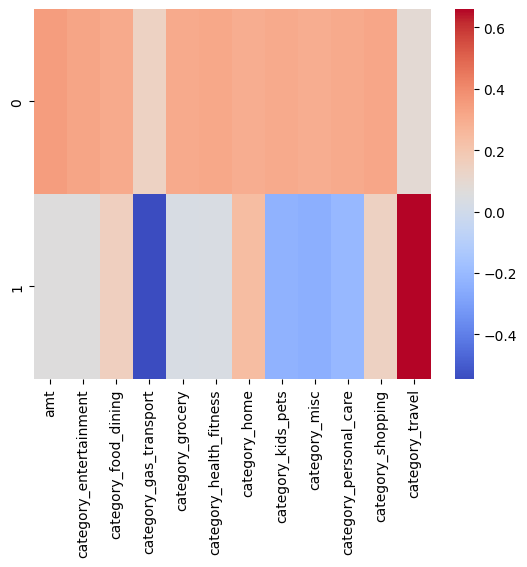

In [10]:
sns.heatmap(df_comp, cmap='coolwarm')  # coolwarn: 양수이면 빨간색, 음수이면 파란색 계열로 표현

## 속도와 예측력을 향상시키기: 익명 데이터셋

### 다차원 데이터 불러오기

In [11]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)
anonymous.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


대부분 변수 이름이 V1, V2, V3,...처럼 구성되어 있어서 의미를 알 수 없음
- 독립변수 4296개
- 종속변수 class는 0과 1로 구성

In [12]:
anonymous['class'].mean()  # 1의 비율

0.25

In [13]:
anonymous.isna().sum().sum()  # 결측치 확인

0

### PCA에 따른 모델링 성능/결과 비교

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(anonymous.drop('class', axis=1), anonymous['class'], test_size=0.2, random_state=100)

PCA에서 변수 간의 스케일을 일정하게 맞춰주는 것이 중요함

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

시간이 다소 걸리는 랜덤포레스트를 사용하여 PCA 전후 시간 차이를 비교

In [16]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(random_state=100)

In [17]:
import time
start_time = time.time()
model_1.fit(X_train_scaled, y_train)
print(time.time() - start_time)

123.67844295501709


In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score
pred_1 = model_1.predict(X_test_scaled)
accuracy_score(y_test, pred_1)  # 정확도

0.958

In [19]:
proba_1 = model_1.predict_proba(X_test_scaled)
roc_auc_score(y_test, proba_1[:, 1])  # AUC

0.9982541957107813

몇 개의 주성분으로 만들 것인지 정해야 함
- 4천 개가 넘는 변수들을 단 2개로 차원 축소한 뒤 데이터 손실 확인

In [20]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [21]:
pca.explained_variance_ratio_  # 데이터 반영 비율 확인

array([0.04992445, 0.03331409])

각각 0.0499, 0.0333 정도로, 이 둘을 합쳐봐야 기존 데이터의 0.08 정도의 정보만 반영하여 데이터 손실이 매우 크다는 것을 알 수 있음
- K-평균에서 사용한 엘보우 기법을 이용하면 도움을 받을 수 있음

<Axes: >

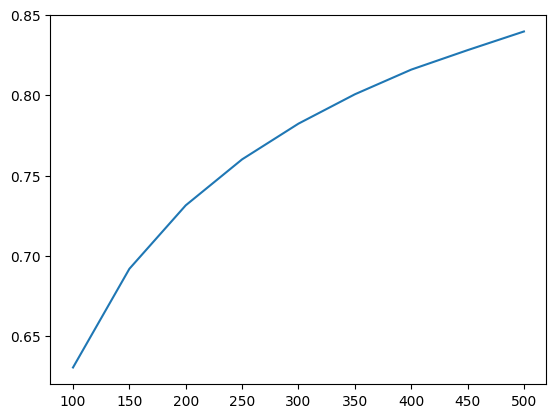

In [22]:
var_ratio = []
for i in range(100, 550, 50):
  pca = PCA(n_components=i)
  pca.fit_transform(X_train_scaled)
  ratio = pca.explained_variance_ratio_.sum()  # 데이터 반영 비율 합
  var_ratio.append(ratio)  # 반영 비율 합을 리스트에 추가

sns.lineplot(x=range(100, 550, 50), y=var_ratio)

주성분 수를 100에서 500까지 확인한 결과 이 범위에서 얻을 수 있는 데이터의 반영 비율은 약 62%~82% 정도임
- k-평균의 엘보우 기법에서처럼 드라마틱하게 꺾이는 부분이 없기 때문에 한눈에 적절한 값을 찾을 수 없음
- 본인의 기준에 맞는 적정값을 가이드 라인으로 삼아, 데이터 손실을 어디까지 감수할 것인지를 정하고 해당 수준에 적합한 주성분 수를 결정하면 됨

80%를 기준으로 잡고, 이에 가장 근사치인 400을 채택해, 주성분이 400개인 데이터를 만듦

In [23]:
pca = PCA(n_components=400, random_state=100)  # 주성분 개수 지정
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [24]:
model_2 = RandomForestClassifier(random_state=100)
start_time = time.time()
model_2.fit(X_train_scaled_pca, y_train)
print(time.time() - start_time)  # 소요 시간

77.31423091888428


In [25]:
pred_2 = model_2.predict(X_test_scaled_pca)
accuracy_score(y_test, pred_2)  # 정확도

0.98925

In [26]:
proba_2 = model_2.predict_proba(X_test_scaled_pca)
roc_auc_score(y_test, proba_2[:, 1])  # AUC

0.9982517669346417

비교

| |소요시간|정확도|AUC|
|---|---|---|---|
|PCA 이전|약 155초|0.958|0.998|
|PCA 이후|약 86초|0.989|0.998|


- PCA를 사용해서 학습 시간을 대폭 줄이고, 거의 동일한 수준의 예측력을 보여줌
- 하지만 PCA가 언제나 이런 성과를 내지는 않음
- 사용하는 알고리즘에 따라, 다루는 데이터에 따라, 떄로는 PCA가 그다지 적절한 역할을 해내지 못할 수도 있음
- 따라서 PCA를 사용했는데도 속도와 예측 성능이 그다지 개선되지 않으면 사용하기에 적합하지 않은 상황이므로, 이러한 특징을 알고 사용해야 함